# Observer design

In [1]:
import numpy as np
from numpy.linalg import eig, inv
from mbrtc import *
import matplotlib.pylab as plt

Phi   = np.array([[1., 0.1],[0.5,0.1]])
Gamma = np.array([[1.0],[0.0]])
C     = np.array([[1., 1.]])
D     = np.array([[0.]])

num,den = ss2tf(Phi,Gamma,C,D)
print('Numerator  : ',num)
print('Denominator: ',den)
print('Characteristic polynomial: ',np.poly(Phi))
print('Poles: ',np.roots(den))
print('Poles: ',eig(Phi)[0])


Numerator  :  [[0.  1.  0.4]]
Denominator:  [ 1.   -1.1   0.05]
Characteristic polynomial:  [ 1.   -1.1   0.05]
Poles:  [1.05249378 0.04750622]
Poles:  [1.05249378 0.04750622]


In [2]:
# Deadbeat observer design:
poles_deadbeat = np.array([0.0, 0.0])
K = place(Phi.T,C.T,poles_deadbeat).T
print("K=",K)

K= [[0.72307692]
 [0.37692308]]


<IPython.core.display.Javascript object>


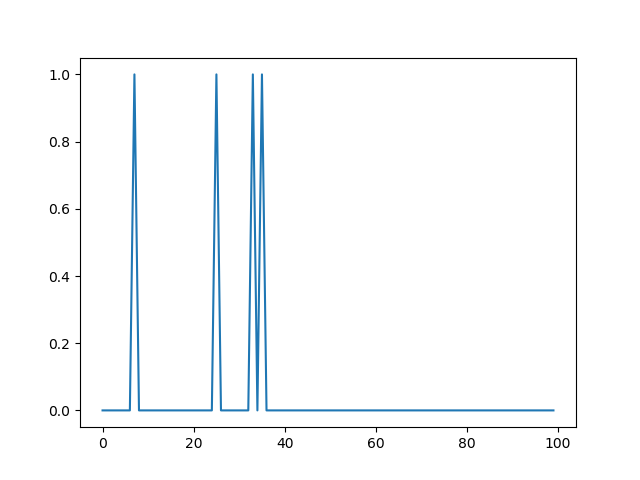

In [3]:
# system simulation:
%matplotlib notebook

NS = 50
x0 = np.ones((2)) # initial state
u = random_impulses(av_samples_per_spike=10,NS=100,nchan=1).T
plt.plot(u[0])

<IPython.core.display.Javascript object>


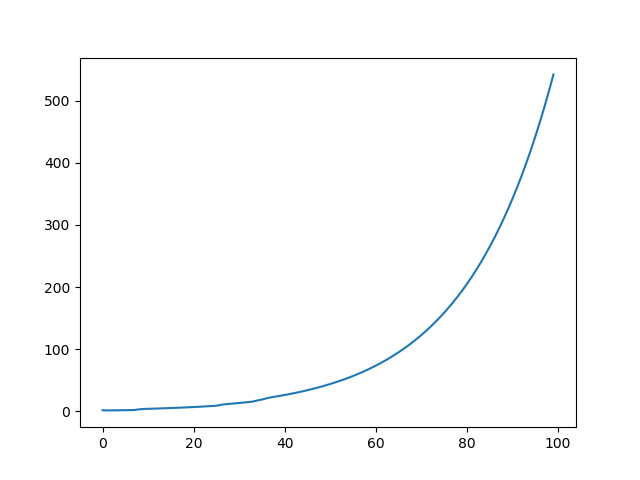

<IPython.core.display.Javascript object>


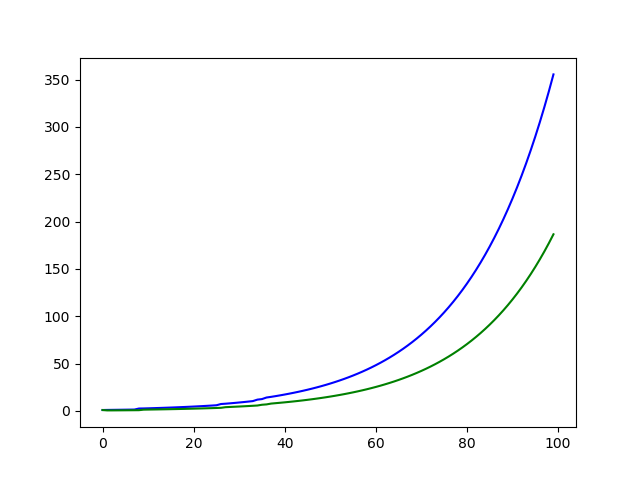

In [4]:
%matplotlib notebook

y,x = sim(Phi,Gamma,C,D,u,x0,return_X=True)
plt.plot(y[0])
plt.figure()
plt.plot(x[0],'b')
plt.plot(x[1],'g')

<IPython.core.display.Javascript object>


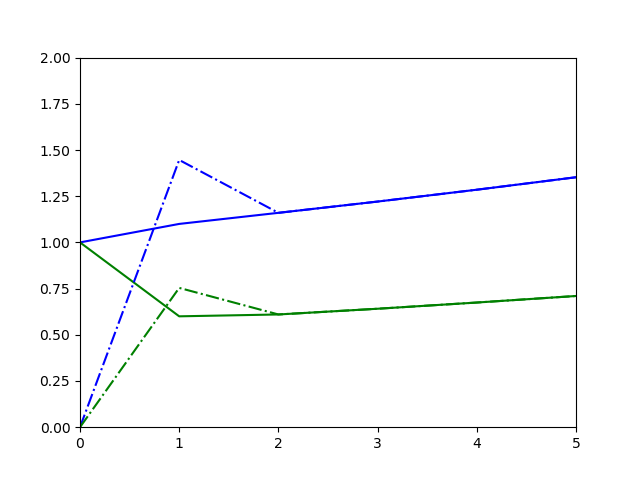

(0, 2)

In [5]:
# Observer:
%matplotlib notebook
Phi_obsv = Phi - K @ C
Gamma_obsv = np.hstack((Gamma,K))
C_obsv = np.eye(2)
D_obsv = np.zeros((2,2))
u_obsv = np.vstack((u,y))
x_obsv = sim(Phi_obsv,Gamma_obsv,C_obsv,D_obsv,u_obsv)

plt.figure()
plt.plot(x[0],'b')
plt.plot(x[1],'g')
plt.plot(x_obsv[0],'b-.')
plt.plot(x_obsv[1],'g-.')
plt.xlim([0,5])
plt.ylim([0,2])